In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
import math
from numpy import linalg as la
from scipy.stats import multivariate_normal

In [2]:
data = pd.read_csv('faithful.dat.txt', skiprows=20, delim_whitespace=True)
data

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
6,2.883,55
7,4.700,88
8,3.600,85
9,1.950,51
10,4.350,85


In [3]:
eruptions = np.array(data['eruptions'])
waiting = np.array(data['waiting'])

In [4]:
np.shape(eruptions)

(272,)

In [5]:
np.shape(waiting)

(272,)

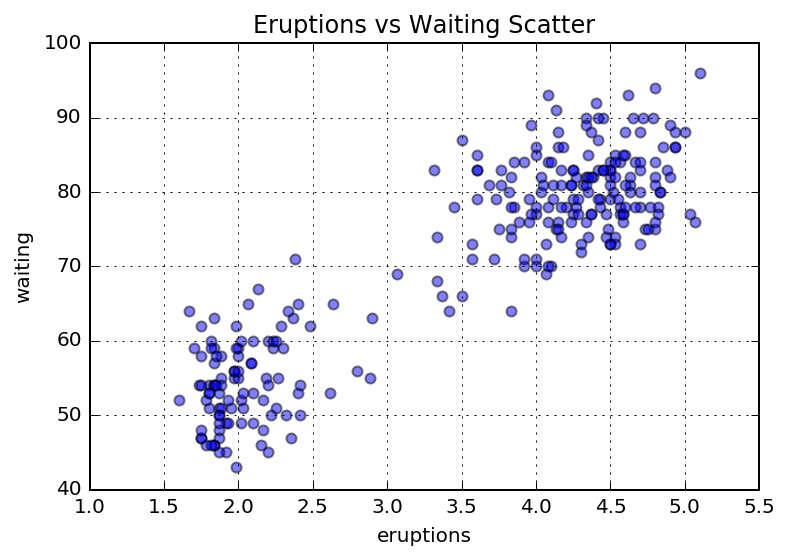

In [6]:
%config InlineBackend.figure_format = 'retina'
plt.scatter(eruptions, waiting, s=25, alpha=0.5, marker='o')
plt.title('Eruptions vs Waiting Scatter')
plt.xlabel('eruptions')
plt.ylabel('waiting')
plt.grid(True)
plt.show()

In [7]:
eruptions_norm = []
waiting_norm = []

## b)

In [8]:
#part_b normalize eruptions data
for i in range(len(eruptions)):
    eruptions_norm.append((eruptions[i] - np.amin(eruptions))/(np.amax(eruptions) - np.amin(eruptions)))

In [9]:
np.shape(eruptions_norm)

(272,)

In [10]:
#part_b normalize waiting data
for i in range(len(waiting)):
    waiting_norm.append((waiting[i] - np.amin(waiting))/(np.amax(waiting) - np.amin(waiting)))

In [11]:
np.shape(waiting_norm)

(272,)

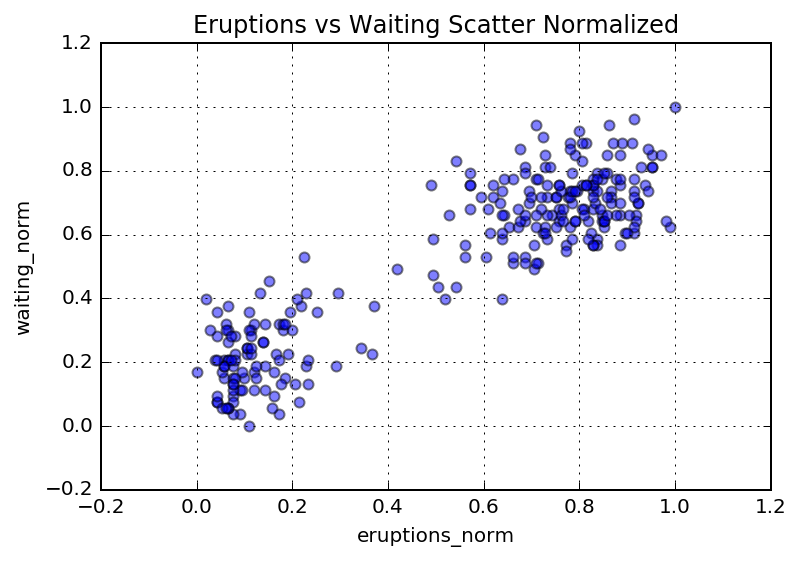

In [12]:
%config InlineBackend.figure_format = 'retina'
plt.scatter(eruptions_norm, waiting_norm, s=25, alpha=0.5, marker='o')
plt.title('Eruptions vs Waiting Scatter Normalized')
plt.xlabel('eruptions_norm')
plt.ylabel('waiting_norm')
plt.grid(True)
plt.show()

## c)

In [13]:
eruptions_norm = np.array(eruptions_norm)
waiting_norm = np.array(waiting_norm)

In [14]:
data_norm = np.vstack((eruptions_norm, waiting_norm)).T

In [15]:
'''
def multi_gaussian_pdf(data, mu, cov):
    for i in range(len(data)):
        f[i] = (1/(2*np.pi*np.sqrt(la.det(cov))))*np.exp(np.dot(np.dot((-1/2)*(data[i] - mu).reshape(-1, 1).T, la.inv(cov)), (data[i] - mu).reshape(-1, 1)));
    return f
'''

'\ndef multi_gaussian_pdf(data, mu, cov):\n    for i in range(len(data)):\n        f[i] = (1/(2*np.pi*np.sqrt(la.det(cov))))*np.exp(np.dot(np.dot((-1/2)*(data[i] - mu).reshape(-1, 1).T, la.inv(cov)), (data[i] - mu).reshape(-1, 1)));\n    return f\n'

In [64]:
def GMM_EM(data):
    # Initialize mu and sigma
    mu = data[np.random.choice(range(len(data)), 2, replace=False)];
    print (mu)
    mu1 = mu[0];
    mu2 = mu[1];
    
    #sigma0 = np.mean(np.cov(data.T));
    #sigma1 = sigma0 * np.identity(2);
    #sigma2 = sigma0 * np.identity(2);
    sigma1 = np.cov(data.T);
    sigma2 = np.cov(data.T);
    #sigma1 = np.identity(2);
    #sigma2 = np.identity(2);
    #sigma1 = np.dot(data.T, data)
    #sigma2 = np.dot(data.T, data)
    
    pi1 = 0.5;
    pi2 = 1 - pi1;
    
    # Start EM
    iteration = 0
    mu1_move = []
    mu2_move = []
    traj_eruption_1 = []
    traj_eruption_2 = []
    traj_waiting_1= []
    traj_waiting_2= []
    
    print (mu1)
    
    while True:
        oldMu1 = mu1
        oldMu2 = mu2
        
        traj_eruption_1.append(oldMu1[0])
        traj_waiting_1.append(oldMu1[1])
        traj_eruption_2.append(oldMu2[0])
        traj_waiting_2.append(oldMu2[1])
        
        mu1_move.append(oldMu1)
        mu2_move.append(oldMu2)
        #E-step: get PDFs
        pdf1 = np.zeros(len(data));
        pdf2 = np.zeros(len(data));
        for j in range(len(data)):
            pdf1[j] = multivariate_normal.pdf(data[j], mean=mu1, cov=sigma1);
            pdf2[j] = multivariate_normal.pdf(data[j], mean=mu2, cov=sigma2);
        
        #print (pdf1)
        
        #E-step: get Gammas
        gamma1 = (pi1 * pdf1) / (pi1 * pdf1 + pi2 * pdf2);
        gamma2 = (pi2 * pdf2) / (pi1 * pdf1 + pi2 * pdf2);
        
        print (gamma1.shape)
        
        #M-step: Update Mus and Sigmas
        mu1 = np.dot(gamma1.reshape(-1,1).T, data) / np.sum(gamma1);
        mu2 = np.dot(gamma2.reshape(-1,1).T, data) / np.sum(gamma2);
        
        '''
        tempSigma_1 = [];
        tempSigma_2 = [];
        for i in range(len(data)):
            tempSigma_1.append(np.dot(gamma1[i] * (data[i] - mu1).reshape(-1, 1), (data[i] - mu1).reshape(-1, 1).T) / np.sum(gamma1));
            tempSigma_2.append(np.dot(gamma2[i] * (data[i] - mu2).reshape(-1, 1), (data[i] - mu2).reshape(-1, 1).T) / np.sum(gamma2));
        
        sigSum1 = np.sum(tempSigma_1, axis=0) 
        sigSum2 = np.sum(tempSigma_2, axis=0)
        '''
        
        oldSigma_1 = sigma1;
        oldSigma_2 = sigma2;
        for i in range(len(data)):
            tempSigma_1 = np.dot(gamma1[i] * (data[i] - mu1).reshape(-1, 1), (data[i] - mu1).reshape(-1, 1).T) / np.sum(gamma1);
            tempSigma_2 = np.dot(gamma2[i] * (data[i] - mu2).reshape(-1, 1), (data[i] - mu2).reshape(-1, 1).T) / np.sum(gamma2);
            sigma1 = oldSigma_1 + tempSigma_1;
            sigma2 = oldSigma_2 + tempSigma_2;
        
        #sigma1 = np.mean(sigma1) * np.identity(2);
        #sigma2 = np.mean(sigma2) * np.identity(2);
        
        #Update Pis
        pi1 = np.sum(gamma1) / len(data);
        pi2 = 1 - pi1;
        
        print (oldMu1)
        print (mu1)
        print (np.allclose(mu1, oldMu1))
        # test if convergent
        if (np.allclose(mu1, oldMu1) == True) & (np.allclose(mu2, oldMu2) == True):
            break
        else:
            iteration = iteration + 1;
        
        
        print (mu1_move)
        print (traj_eruption_1)
        print (traj_waiting_1)
    
        return iteration, traj_eruption_1, traj_waiting_1, traj_eruption_2, traj_waiting_2

In [65]:
GMM_EM(data_norm)

[[ 0.95228571  0.8490566 ]
 [ 0.88571429  0.8490566 ]]
[ 0.95228571  0.8490566 ]
(272,)
[ 0.95228571  0.8490566 ]
[[ 0.57161286  0.52639993]]
False
[array([ 0.95228571,  0.8490566 ])]
[0.95228571428571429]
[0.84905660377358494]


(1,
 [0.95228571428571429],
 [0.84905660377358494],
 [0.8857142857142859],
 [0.84905660377358494])

In [18]:
'''totalIter = []
for i in range(50):
    totalIter.append(GMM_EM(data_norm)[0]);
    '''

'totalIter = []\nfor i in range(50):\n    totalIter.append(GMM_EM(data_norm)[0]);\n    '